In [154]:
import matplotlib.pyplot as plt
import numpy as np
import meep as mp

In [236]:
cell=mp.Vector3(10, 10, 10)
geometry = [mp.Block(material=mp.Medium(index=5), center=mp.Vector3(0, -.6), size=mp.Vector3(1, 1, 1)),
            mp.Block(material=mp.Medium(index=5), center=mp.Vector3(0, .6), size=mp.Vector3(1, 1, 1))]
sources = [mp.Source(mp.ContinuousSource(frequency=2*mp.pi*3e8/633e-9), volume=mp.Volume(mp.Vector3(-2, 0)), component=mp.Ez, amplitude=10)]
pmls = [mp.PML(1)]
simulation = mp.Simulation(cell, 10, geometry, dimensions=2,boundary_layers=pmls, sources=sources, force_complex_fields=True)

final residual = 5.19659e-09
Finished solve_cw after 19 CG iters (~ 76 timesteps).
     block, center = (0,-0.6,0)
          size (1,1,1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (25,25,25)
     block, center = (0,0.6,0)
          size (1,1,1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (25,25,25)


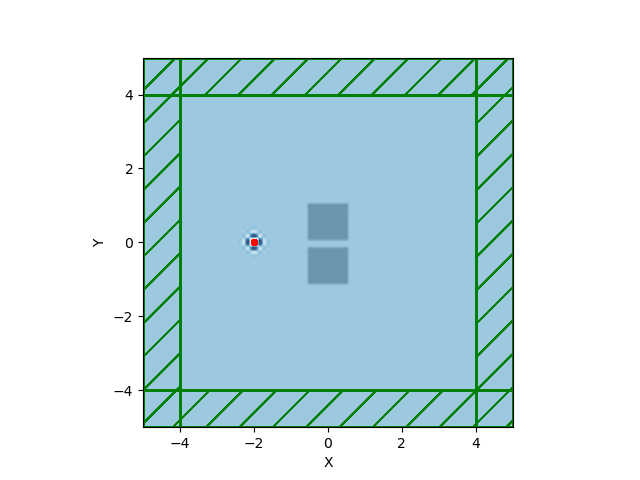

In [239]:
%matplotlib widget
#simulation.run(until=2000)
simulation.init_sim()
simulation.solve_cw(L=2)
simulation.plot2D(fields=mp.Ez, output_plane=mp.Volume(size=mp.Vector3(10, 10, 0)))
#simulation.plot2D(fields=mp.Ez, output_plane=mp.Volume(size=mp.Vector3(10, 10, 0)))
plt.show()

In [230]:
cell = mp.Vector3(10, 10, 10)
ez_data = simulation.get_array(center=mp.Vector3(), size=cell, component=mp.Ez).transpose()

In [231]:
plt.imshow((np.abs(ez_data+1)**2), cmap='viridis')